In [4]:
!pip install eli5

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 216 kB 34.9 MB/s 
     |████████████████████████████████| 133 kB 56.3 MB/s 
  Created wheel for eli5: filename=eli5-0.13.0-py2.py3-none-any.whl size=107748 sha256=cb59fc838eedf0c92bff4ca9eb68d8cf0c7e81ed31b50b89afff37c612467183
  Stored in directory: /root/.cache/pip/wheels/cc/3c/96/3ead31a8e6c20fc0f1a707fde2e05d49a80b1b4b30096573be
Successfully built eli5
  Attempting uninstall: jinja2
    Found existing installation: Jinja2 2.11.3
    Uninstalling Jinja2-2.11.3:
      Successfully uninstalled Jinja2-2.11.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
notebook 5.7.16 requires jinja2<=3.0.0, but you have jinja2 3.1.2 which is incompatible.
flask 1.1.4 requires Jinja2<3.0,>=2.10.1, but you have jinja2 3.1.2 which is incomp

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import os

# NLP Packages
import nltk 
from nltk.corpus import stopwords
from textblob import TextBlob 
from textblob import Word
import re
import string
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import cross_val_score
import eli5



# WordCloud
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

# Pandas Settings
pd.set_option('display.max_columns', 10000)
pd.set_option('display.max_rows', 100)

# Solve warnings
import warnings
from sklearn.exceptions import ConvergenceWarning
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=ConvergenceWarning)

**Data Understanding**
----------------------
First and foremost thing in any machine learning model or project is the DATASET. Sometimes the dataset can be a problem because understanding the dataset is very important step in any so called machine learing models.

Due to Data-Quality the Models can be Overfitting as well Underfitting.

**What is Overfitting?**

-->In overfitting, the model fails to generalize i.e models performs well on training set but poorly on test set. Typically indicating that model is too flexible for amount of training data. Flexibility of data allows our model to learn from uneccessary Noise; which is unwanted in any ML models because it allows our ML models to behave in the we don't want it to. It corresponds to high variance, that is, a small change in data will lead to a big in the results.

**What is Underfitting?**

-->It is actually a failure to capture the important patterns in tha tarining set. Typically saying, the model is too simple to have a explonatory variables. It corresponds to 'high-bias', which shows systematic lack of fit in certain regions.

In [3]:
#Uploading the Data-set from System
from google.colab import files
uploaded = files.upload()

Saving tripadvisor_hotel_reviews.csv to tripadvisor_hotel_reviews.csv


In [6]:
df = pd.read_csv('tripadvisor_hotel_reviews.csv')

In [7]:
df.shape

(20491, 2)

As we have a very large dataset, it will lead to problem in Modeling. At the end we decided to use only 20% of the data, to avoid dimensionality.

In [ ]:
from google.colab import drive

drive.mount('/content/gdrive/', force_remount=True)

In [8]:
reviews_df = pd.read_csv("tripadvisor_hotel_reviews.csv", nrows=100)
reviews_df.head(3)

,Review,Rating
0,nice hotel expensive parking got good deal sta...,4
1,ok nothing special charge diamond member hilto...,2
2,nice rooms not 4* experience hotel monaco seat...,3


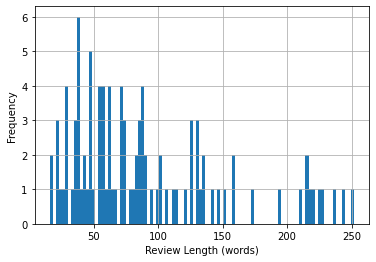

In [9]:
## Getting the number of words by splitting them by a space
import matplotlib.pyplot as plt
words_per_review = reviews_df.Review.apply(lambda x: len(x.split(" ")))
words_per_review.hist(bins = 100)
plt.xlabel('Review Length (words)')
plt.ylabel('Frequency')
plt.show()


In [13]:
print('Average words:', words_per_review.mean())
print('Skewness:', words_per_review.skew())

Average words: 90.34
Skewness: 1.1253755199943984


In [12]:
percent_val = 100 * reviews_df['Rating'].value_counts()/len(reviews_df)
percent_val

4    37.500000
5    36.363636
2    13.636364
1    12.500000
Name: Rating, dtype: float64

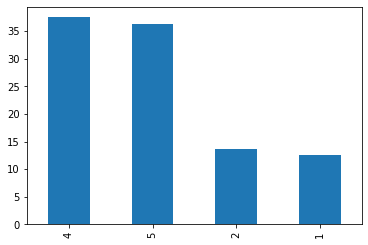

In [14]:
percent_val.plot.bar()
plt.show()

In [10]:
import numpy as np
# Mapping the ratings
reviews_df['Sentiment_rating'] = np.where(reviews_df.Rating > 3,1,0)

## Removing neutral reviews 
reviews_df = reviews_df[reviews_df.Rating != 3]

# Printing the counts of each class
reviews_df['Sentiment_rating'].value_counts()


1    65
0    23
Name: Sentiment_rating, dtype: int64

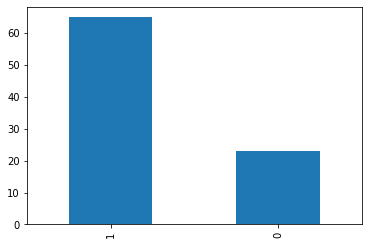

In [15]:
reviews_df.Sentiment_rating.value_counts().plot.bar()
plt.show()

In [16]:
import nltk
from nltk import word_tokenize
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from collections import Counter
from wordcloud import WordCloud

# Modeling packages
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

import re

from pylab import rcParams
import warnings
warnings.filterwarnings("ignore")
rcParams['figure.figsize'] = 14, 6
plt.style.use('ggplot')

In [17]:
import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
  

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [18]:
from nltk import word_tokenize
reviews_df['reviews_text_new'] = reviews_df['Review'].str.lower()

# For reviews not converted to lower case
token_lists = [word_tokenize(each) for each in reviews_df['Review']]
tokens = [item for sublist in token_lists for item in sublist]
print("Number of unique tokens then: ",len(set(tokens)))

# For reviews converted to lower case
token_lists_lower = [word_tokenize(each) for each in reviews_df['reviews_text_new']]
tokens_lower = [item for sublist in token_lists_lower for item in sublist]
print("Number of unique tokens now: ",len(set(tokens_lower)))

Number of unique tokens then:  2391
Number of unique tokens now:  2391


In [21]:
nltk.pos_tag(tokens_lower[:10])

[('nice', 'JJ'),
 ('hotel', 'NN'),
 ('expensive', 'JJ'),
 ('parking', 'NN'),
 ('got', 'VBD'),
 ('good', 'JJ'),
 ('deal', 'NN'),
 ('stay', 'VB'),
 ('hotel', 'NN'),
 ('anniversary', 'NN')]

In [19]:
tagged_words= nltk.pos_tag(tokens_lower)

In [20]:
from nltk.corpus import sentiwordnet as swn, wordnet as wn
from nltk.corpus import wordnet


In [22]:
def analyze_sentiment_sentiwordnet_lexicon(tokens_lower, verbose=False):

    # tokenize and POS tag text tokens
    pos_score = neg_score = token_count = obj_score = 0
    # get wordnet synsets based on POS tags
    # get sentiment scores if synsets are found
    for word, tag in tagged_words:
        ss_set = None
        if 'NN' in tag and list(swn.senti_synsets(word, 'n')):
            ss_set = list(swn.senti_synsets(word, 'n'))[0]
        elif 'VB' in tag and list(swn.senti_synsets(word, 'v')):
            ss_set = list(swn.senti_synsets(word, 'v'))[0]
        elif 'JJ' in tag and list(swn.senti_synsets(word, 'a')):
            ss_set = list(swn.senti_synsets(word, 'a'))[0]
        elif 'RB' in tag and list(swn.senti_synsets(word, 'r')):
            ss_set = list(swn.senti_synsets(word, 'r'))[0]
        # if senti-synset is found        
        if ss_set:
            # add scores for all found synsets
            pos_score += ss_set.pos_score()
            neg_score += ss_set.neg_score()
            obj_score += ss_set.obj_score()
            token_count += 1

      
      # aggregate final scores
    final_score = pos_score - neg_score
    norm_final_score = round(float(final_score) / token_count, 2)
    final_sentiment = 'positive' if norm_final_score >= 0.05 else 'negative'
    if verbose:
        norm_obj_score = round(float(obj_score) / token_count, 2)
        norm_pos_score = round(float(pos_score) / token_count, 2)
        norm_neg_score = round(float(neg_score) / token_count, 2)
        # to display results in a nice table
        sentiment_frame = pd.DataFrame([[final_sentiment, norm_obj_score, norm_pos_score, 
                                         norm_neg_score, norm_final_score]],
                                       columns=pd.MultiIndex(levels=[['SENTIMENT STATS:'], 
                                                             ['Predicted Sentiment', 'Objectivity',
                                                              'Positive', 'Negative', 'Overall']], 
                                                             labels=[[0,0,0,0,0],[0,1,2,3,4]]))
        display(sentiment_frame)
        
    return final_sentiment


In [23]:
#Removing Special Characters

### Selecting non alpha numeric charactes that are not spaces
spl_chars = reviews_df['reviews_text_new'].apply(lambda review: 
                                                     [char for char in list(review) if not char.isalnum() and char != ' '])

## Getting list of list into a single list
flat_list = [item for sublist in spl_chars for item in sublist]

## Unique special characters
set(flat_list)

{"'", '+', ',', '-', '.', '/', ':', '_', '`'}

In [24]:
review_backup = reviews_df['reviews_text_new'].copy()
reviews_df['reviews_text_new'] = reviews_df['reviews_text_new'].str.replace(r'[^A-Za-z0-9]+', ' ')

In [25]:
print("- Old Review -")
print(review_backup.values[7])
print("\n- New Review -")
print(reviews_df['reviews_text_new'][8])

- Old Review -
hotel stayed hotel monaco cruise, rooms generous decorated uniquely, hotel remodeled pacific bell building charm sturdiness, everytime walked bell men felt like coming home, secure, great single travelers, location fabulous, walk things pike market space needle.little grocery/drug store block away, today green, bravo, 1 double bed room room bed couch separated curtain, snoring mom slept curtain, great food nearby,  

- New Review -
hotel stayed hotel monaco cruise rooms generous decorated uniquely hotel remodeled pacific bell building charm sturdiness everytime walked bell men felt like coming home secure great single travelers location fabulous walk things pike market space needle little grocery drug store block away today green bravo 1 double bed room room bed couch separated curtain snoring mom slept curtain great food nearby 


In [26]:
reviews_df.head(5)

,Review,Rating,Sentiment_rating,reviews_text_new
0,nice hotel expensive parking got good deal sta...,4,1,nice hotel expensive parking got good deal sta...
1,ok nothing special charge diamond member hilto...,2,0,ok nothing special charge diamond member hilto...
3,"unique, great stay, wonderful time hotel monac...",5,1,unique great stay wonderful time hotel monaco ...
4,"great stay great stay, went seahawk game aweso...",5,1,great stay great stay went seahawk game awesom...
5,love monaco staff husband stayed hotel crazy w...,5,1,love monaco staff husband stayed hotel crazy w...


In [27]:
#Removal of stop words

from nltk.corpus import stopwords

print('Available languages for NLTK v.3.4.5: ')
print(stopwords.fileids())

Available languages for NLTK v.3.4.5: 
['arabic', 'azerbaijani', 'basque', 'bengali', 'catalan', 'chinese', 'danish', 'dutch', 'english', 'finnish', 'french', 'german', 'greek', 'hebrew', 'hinglish', 'hungarian', 'indonesian', 'italian', 'kazakh', 'nepali', 'norwegian', 'portuguese', 'romanian', 'russian', 'slovene', 'spanish', 'swedish', 'tajik', 'turkish']


In [28]:
noise_words = []
eng_stop_words = stopwords.words('english')
eng_stop_words

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [29]:
stop_words = set(eng_stop_words)
without_stop_words = []
stopword = []
sentence = reviews_df['reviews_text_new'][0]
words = nltk.word_tokenize(sentence)

for word in words:
    if word in stop_words:
        stopword.append(word)
    else:
        without_stop_words.append(word)

print('-- Original Sentence --\n', sentence)
print('\n-- Stopwords in the sentence --\n', stopword)
print('\n-- Non-stopwords in the sentence --\n', without_stop_words)

-- Original Sentence --
 nice hotel expensive parking got good deal stay hotel anniversary arrived late evening took advice previous reviews did valet parking check quick easy little disappointed non existent view room room clean nice size bed comfortable woke stiff neck high pillows not soundproof like heard music room night morning loud bangs doors opening closing hear people talking hallway maybe just noisy neighbors aveda bath products nice did not goldfish stay nice touch taken advantage staying longer location great walking distance shopping overall nice experience having pay 40 parking night 

-- Stopwords in the sentence --
 ['did', 'not', 'just', 'did', 'not', 'having']

-- Non-stopwords in the sentence --
 ['nice', 'hotel', 'expensive', 'parking', 'got', 'good', 'deal', 'stay', 'hotel', 'anniversary', 'arrived', 'late', 'evening', 'took', 'advice', 'previous', 'reviews', 'valet', 'parking', 'check', 'quick', 'easy', 'little', 'disappointed', 'non', 'existent', 'view', 'room',

In [30]:
def stopwords_removal(stop_words, sentence):
    return [word for word in nltk.word_tokenize(sentence) if word not in stop_words]

reviews_df['reviews_text_nonstop'] = reviews_df['reviews_text_new'].apply(lambda row: stopwords_removal(stop_words, row))
reviews_df[['reviews_text_new','reviews_text_nonstop']]

,reviews_text_new,reviews_text_nonstop
0,nice hotel expensive parking got good deal sta...,"[nice, hotel, expensive, parking, got, good, d..."
1,ok nothing special charge diamond member hilto...,"[ok, nothing, special, charge, diamond, member..."
3,unique great stay wonderful time hotel monaco ...,"[unique, great, stay, wonderful, time, hotel, ..."
4,great stay great stay went seahawk game awesom...,"[great, stay, great, stay, went, seahawk, game..."
5,love monaco staff husband stayed hotel crazy w...,"[love, monaco, staff, husband, stayed, hotel, ..."
6,cozy stay rainy city husband spent 7 nights mo...,"[cozy, stay, rainy, city, husband, spent, 7, n..."
7,excellent staff housekeeping quality hotel cho...,"[excellent, staff, housekeeping, quality, hote..."
8,hotel stayed hotel monaco cruise rooms generou...,"[hotel, stayed, hotel, monaco, cruise, rooms, ..."
9,excellent stayed hotel monaco past w e delight...,"[excellent, stayed, hotel, monaco, past, w, e,..."
10,poor value stayed monaco seattle july nice hot...,"[poor, value, stayed, monaco, seattle, july, n..."


In [31]:
print("- Old Review -")
print(reviews_df['reviews_text_new'][6])
print("\n- New Review -")
print(reviews_df['reviews_text_nonstop'][6])


- Old Review -
cozy stay rainy city husband spent 7 nights monaco early january 2008 business trip chance come ride we booked monte carlo suite proved comfortable longish stay room 905 located street building street noise not problem view interesting rooms building look dank alley midsection large office building suite comfortable plenty room spread bathroom attractive squeaky clean small comparison generous proportions sitting sleeping areas lots comfortable seating options good lighting plenty storage clothing luggage hotel staff friendly efficient housekeeping staff did great job pleasant requests responded quickly the location quite good easy walk pike street market seattle art museum notch shopping dining options a positive experience 

- New Review -
['cozy', 'stay', 'rainy', 'city', 'husband', 'spent', '7', 'nights', 'monaco', 'early', 'january', '2008', 'business', 'trip', 'chance', 'come', 'ride', 'booked', 'monte', 'carlo', 'suite', 'proved', 'comfortable', 'longish', 'stay',

In [32]:
#Stemming and lemmatization
from nltk.stem.porter import PorterStemmer
porter_stemmer = PorterStemmer()

word_data = "It originated from the idea that there are readers who prefer learning new skills from the comforts of their drawing rooms"
# First Word tokenization
nltk_tokens = word_tokenize(word_data)
#Next find the roots of the word
for w in nltk_tokens:
       print ("Actual: %s  Stem: %s"  % (w,porter_stemmer.stem(w)))

Actual: It  Stem: it
Actual: originated  Stem: origin
Actual: from  Stem: from
Actual: the  Stem: the
Actual: idea  Stem: idea
Actual: that  Stem: that
Actual: there  Stem: there
Actual: are  Stem: are
Actual: readers  Stem: reader
Actual: who  Stem: who
Actual: prefer  Stem: prefer
Actual: learning  Stem: learn
Actual: new  Stem: new
Actual: skills  Stem: skill
Actual: from  Stem: from
Actual: the  Stem: the
Actual: comforts  Stem: comfort
Actual: of  Stem: of
Actual: their  Stem: their
Actual: drawing  Stem: draw
Actual: rooms  Stem: room


In [33]:
from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()

word_data = "It originated from the idea that there are readers who prefer learning new skills from the comforts of their drawing rooms"
nltk_tokens = nltk.word_tokenize(word_data)
for w in nltk_tokens:
       print ("Actual: %s  Lemma: %s"  % (w,wordnet_lemmatizer.lemmatize(w)))


Actual: It  Lemma: It
Actual: originated  Lemma: originated
Actual: from  Lemma: from
Actual: the  Lemma: the
Actual: idea  Lemma: idea
Actual: that  Lemma: that
Actual: there  Lemma: there
Actual: are  Lemma: are
Actual: readers  Lemma: reader
Actual: who  Lemma: who
Actual: prefer  Lemma: prefer
Actual: learning  Lemma: learning
Actual: new  Lemma: new
Actual: skills  Lemma: skill
Actual: from  Lemma: from
Actual: the  Lemma: the
Actual: comforts  Lemma: comfort
Actual: of  Lemma: of
Actual: their  Lemma: their
Actual: drawing  Lemma: drawing
Actual: rooms  Lemma: room


In [ ]:
#Working on Machine Learning Model
reviews_df[['Review','Rating','Sentiment_rating']].head(5)


,Review,Rating,Sentiment_rating
0,nice hotel expensive parking got good deal sta...,4,1
1,ok nothing special charge diamond member hilto...,2,0
3,"unique, great stay, wonderful time hotel monac...",5,1
4,"great stay great stay, went seahawk game aweso...",5,1
5,love monaco staff husband stayed hotel crazy w...,5,1


In [34]:
from nltk import ngrams

sentence = 'A bird in the hand worths two in the bush'

for n in range(1, 6):
    print(str(n) + '-grams:\n', list(ngrams(sentence.split(), n)))


1-grams:
 [('A',), ('bird',), ('in',), ('the',), ('hand',), ('worths',), ('two',), ('in',), ('the',), ('bush',)]
2-grams:
 [('A', 'bird'), ('bird', 'in'), ('in', 'the'), ('the', 'hand'), ('hand', 'worths'), ('worths', 'two'), ('two', 'in'), ('in', 'the'), ('the', 'bush')]
3-grams:
 [('A', 'bird', 'in'), ('bird', 'in', 'the'), ('in', 'the', 'hand'), ('the', 'hand', 'worths'), ('hand', 'worths', 'two'), ('worths', 'two', 'in'), ('two', 'in', 'the'), ('in', 'the', 'bush')]
4-grams:
 [('A', 'bird', 'in', 'the'), ('bird', 'in', 'the', 'hand'), ('in', 'the', 'hand', 'worths'), ('the', 'hand', 'worths', 'two'), ('hand', 'worths', 'two', 'in'), ('worths', 'two', 'in', 'the'), ('two', 'in', 'the', 'bush')]
5-grams:
 [('A', 'bird', 'in', 'the', 'hand'), ('bird', 'in', 'the', 'hand', 'worths'), ('in', 'the', 'hand', 'worths', 'two'), ('the', 'hand', 'worths', 'two', 'in'), ('hand', 'worths', 'two', 'in', 'the'), ('worths', 'two', 'in', 'the', 'bush')]


In [35]:
#Bag of words
# The following code creates a word-document matrix.
from sklearn.feature_extraction.text import CountVectorizer

vec = CountVectorizer()
X = vec.fit_transform(reviews_df['reviews_text_new'])
df = pd.DataFrame(X.toarray(), columns = vec.get_feature_names())
df.head()


00  05  10  100  1000  10pm  10th  11  12  1230pm  125  12th  13  15  150  \
0   0   0   0    0     0     0     0   0   0       0    0     0   0   0    0   
1   0   0   0    0     0     0     0   1   0       0    0     0   0   0    0   
2   0   0   0    0     0     0     0   0   0       0    0     0   0   0    0   
3   0   0   0    0     0     0     0   0   0       0    0     0   0   0    0   
4   0   0   0    0     0     0     0   0   0       0    1     1   0   0    0   

   175  17th  18  19  1920  1962  1970  1999  1pm  1st  20  200  20000  2005  \
0    0     0   0   0     0     0     0     0    0    0   0    0      0     0   
1    0     0   0   0     0     0     0     0    0    0   0    0      0     0   
2    0     0   0   0     0     0     0     0    0    0   0    0      0     0   
3    0     0   0   0     0     0     0     0    0    0   0    0      0     0   
4    1     0   0   0     0     0     0     0    0    0   0    0      0     0   

   2007  2007my  2008  20th  21  220  23  23rd  24  24th  25  250  27  28  29  \
0     0       0     0     0   0    0   0     0   0     0   0    0   0   0   0   
1     0       0     0     2   0    0   0     0   0     0   0    0   0   0   0   
2     0       0     0     0   0    0   0     0   0     0   0    0   0   0   0   
3     0       0     0     0   0    0   0     0   0     0   0    0   0   0   0   
4     0       0     0     0   0    0   0     0   0     0   0    0   0   0   0   

   2nd  30  300  30pm  32  32nd  34th  35  38  3pm  3rd  40  400  45  4pm  \
0    0   0    0     0   0     0     0   0   0    0    0   1    0   0    0   
1    0   0    0     0   0     0     0   0   0    0    0   0    0   0    0   
2    0   0    0     0   0     0     0   0   0    0    0   0    0   0    0   
3    0   0    0     0   0     0     0   0   0    0    0   0    0   0    0   
4    0   0    0     0   0     0     0   0   0    0    0   0    0   0    0   

   4th  50  5th  65  72  8th  90  905  aaa  aadvantage  able  absolute  \
0    0   0    0   0   0    0   0    0    0           0     0         0   
1    0   0    0   0   0    0   0    0    0           0     0         0   
2    0   0    0   0   0    0   0    0    0           0     0         0   
3    0   0    0   0   0    0   0    0    0           0     0         0   
4    0   0    0   0   0    0   0    0    0           0     0         0   

   absolutely  ac  accept  access  accessible  accommodating  accomodating  \
0           0   0       0       0           0              0             0   
1           0   1       0       0           0              0             0   
2           0   0       0       0           0              0             0   
3           0   0       1       0           0              0             0   
4           0   0       0       1           0              0             0   

   accomodation  accomodations  accross  ace  acknowledged  acquire  \
0             0              0        0    0             0        0   
1             0              0        0    0             0        0   
2             0              0        0    0             0        0   
3             0              0        0    0             0        0   
4             0              0        0    0             0        0   

   activities  actually  acually  adam  add  added  adding  addition  \
0           0         0        0     0    0      0       0         0   
1           0         0        0     0    0      0       0         0   
2           0         0        0     0    0      0       0         0   
3           1         0        0     0    0      0       0         0   
4           0         0        0     0    0      0       0         0   

   additional  additionally  addressed  adequate  adjacent  adjustable  admit  \
0           0             0          0         0         0           0      0   
1           0             0          0         0         0           0      0   
2           0             0          0         0         0           0    

In [37]:
### Creating a python object of the class CountVectorizer

bow_counts = CountVectorizer(tokenizer= word_tokenize, # type of tokenization
                             stop_words=noise_words, # List of stopwords
                             ngram_range=(1,1)) # number of n-grams

bow_data = bow_counts.fit_transform(reviews_df['reviews_text_new'])


In [38]:
bow_data

<88x2293 sparse matrix of type '<class 'numpy.int64'>'
	with 6362 stored elements in Compressed Sparse Row format>

In [39]:
#Training and Test-Sets Division
X_train_bow, X_test_bow, y_train_bow, y_test_bow = train_test_split(bow_data, # Features
reviews_df['Sentiment_rating'], # Target variable
test_size = 0.2, # 20% test size
random_state = 0) # random state for replication purposes

In [40]:
y_test_bow.value_counts()/y_test_bow.shape[0]


1    0.722222
0    0.277778
Name: Sentiment_rating, dtype: float64

**Logistic Regression**
-----------------------


In [41]:
### Training the model 
lr_model_all = LogisticRegression() # Logistic regression
lr_model_all.fit(X_train_bow, y_train_bow) # Fitting a logistic regression model

## Predicting the output
test_pred_lr_all = lr_model_all.predict(X_test_bow) # Class prediction

## Calculate key performance metrics
print("F1 score: ", f1_score(y_test_bow, test_pred_lr_all))



F1 score:  0.896551724137931


In [42]:
### Changes with respect to the previous code
### 1. Increasing the n-grams from just having 1-gram to (1-gram, 2-gram, 3-gram, and 4-gram)
### 2. Including the stopwords in the bag of words features

bow_counts = CountVectorizer(tokenizer= word_tokenize,
                             ngram_range=(1,4))

bow_data = bow_counts.fit_transform(reviews_df.reviews_text_new)

In [43]:
# Notice the increase in features with inclusion of n-grams
bow_data

<88x24194 sparse matrix of type '<class 'numpy.int64'>'
	with 29176 stored elements in Compressed Sparse Row format>

In [60]:
X_train_bow, X_test_bow, y_train_bow, y_test_bow = train_test_split(bow_data,
reviews_df['Sentiment_rating'],
test_size = 0.2,
random_state = 0)

In [45]:
# Defining and training the model
lr_model_all_new = LogisticRegression(max_iter = 200)
lr_model_all_new.fit(X_train_bow, y_train_bow)

# Predicting the results
test_pred_lr_all = lr_model_all_new.predict(X_test_bow)

print("F1 score: ", f1_score(y_test_bow,test_pred_lr_all))

F1 score:  0.8387096774193548


In [46]:
from sklearn.feature_extraction.text import TfidfVectorizer

### Creating a python object of the class CountVectorizer
tfidf_counts = TfidfVectorizer(tokenizer= word_tokenize, # type of tokenization
                               stop_words=noise_words, # List of stopwords
                               ngram_range=(1,1)) # number of n-grams

tfidf_data = tfidf_counts.fit_transform(reviews_df['reviews_text_new'])

In [ ]:
tfidf_data

<88x2293 sparse matrix of type '<class 'numpy.float64'>'
	with 6362 stored elements in Compressed Sparse Row format>

In [47]:
X_train_tfidf, X_test_tfidf, y_train_tfidf, y_test_tfidf = train_test_split(tfidf_data,
reviews_df['Sentiment_rating'],
test_size = 0.2,
random_state = 0)

In [48]:
### Setting up the model class
lr_model_tf_idf = LogisticRegression()

## Training the model 
lr_model_tf_idf.fit(X_train_tfidf,y_train_tfidf)

## Prediciting the results
test_pred_lr_all = lr_model_tf_idf.predict(X_test_tfidf)

## Evaluating the model
print("F1 score: ",f1_score(y_test_bow, test_pred_lr_all))

F1 score:  0.8387096774193548


In [62]:
X = "The stay was good"
lr_model_tf_idf.predict(X)

ValueError: ignored